In [148]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [154]:
np.random.seed(9)
def trig_func(x):
    return np.sin(x) * np.sin(x) 
def error_func(x, sigma_sq):
    return np.random.normal(0, np.sqrt(sigma_sq), x.shape)


X = np.linspace(0, 3*np.pi, 10000)
y_true = trig_func(X) + error_func(X, 0.03)
X_plot = np.linspace(0, 3*np.pi, 1000)
y_plot = trig_func(X_plot) + error_func(X_plot, 0.03)

df = pd.DataFrame({'X': X, 'y_true': y_true})
df

,X,y_true
0,0.000000,0.000192
1,0.000943,-0.050150
2,0.001885,-0.193305
3,0.002828,-0.002223
4,0.003770,-0.065520
...,...,...
9995,9.421008,0.122149
9996,9.421950,-0.263242
9997,9.422893,-0.016364
9998,9.423835,0.335905


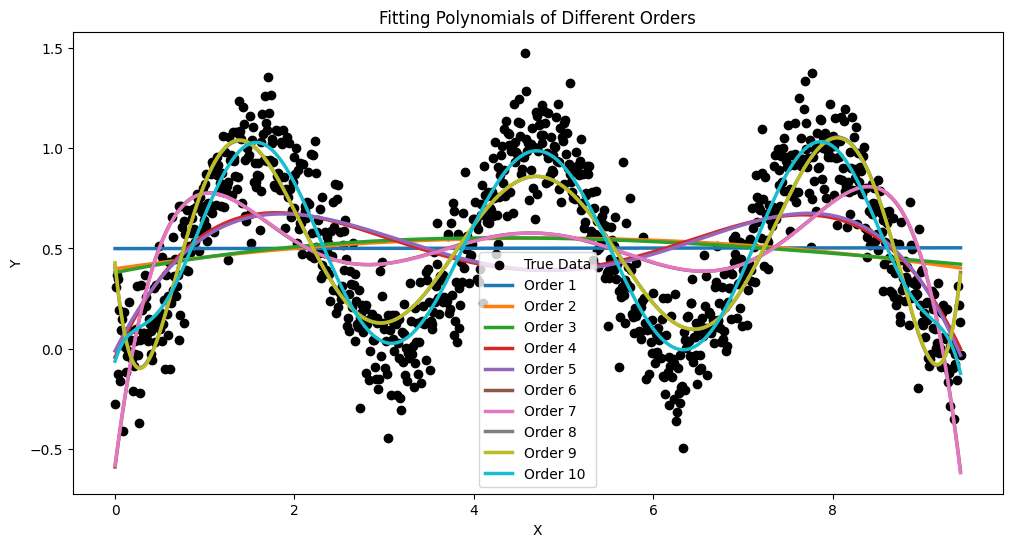

In [155]:
order_range = range(1, 11)
coefficients = []
for order in order_range:
    poly_coeff = np.polyfit(X_plot, y_plot, order)
    coefficients.append(poly_coeff)
plt.figure(figsize=(12, 6))
plt.scatter(X_plot, y_plot, color='black', label='True Data')

for i, order in enumerate(order_range):
    poly_coeff = coefficients[i]
    fitted_poly = np.poly1d(poly_coeff)
    plt.plot(X_plot, fitted_poly(X_plot), label=f'Order {order}', linewidth=2.5)  

plt.title('Fitting Polynomials of Different Orders')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

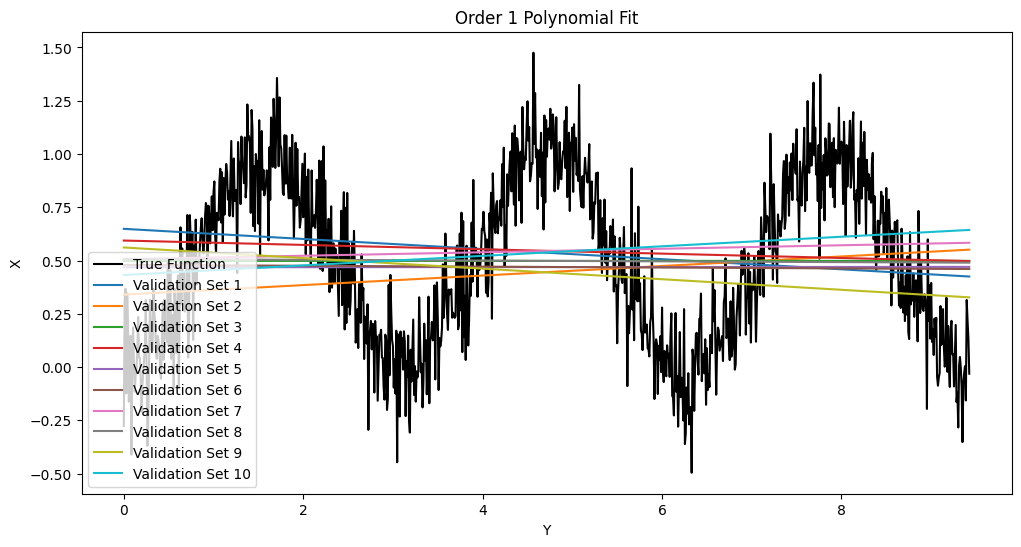

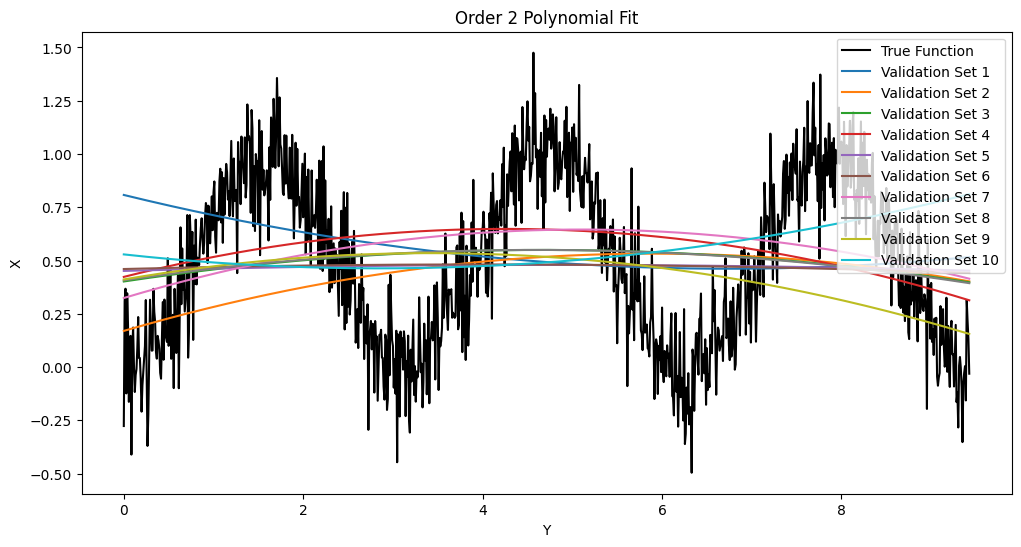

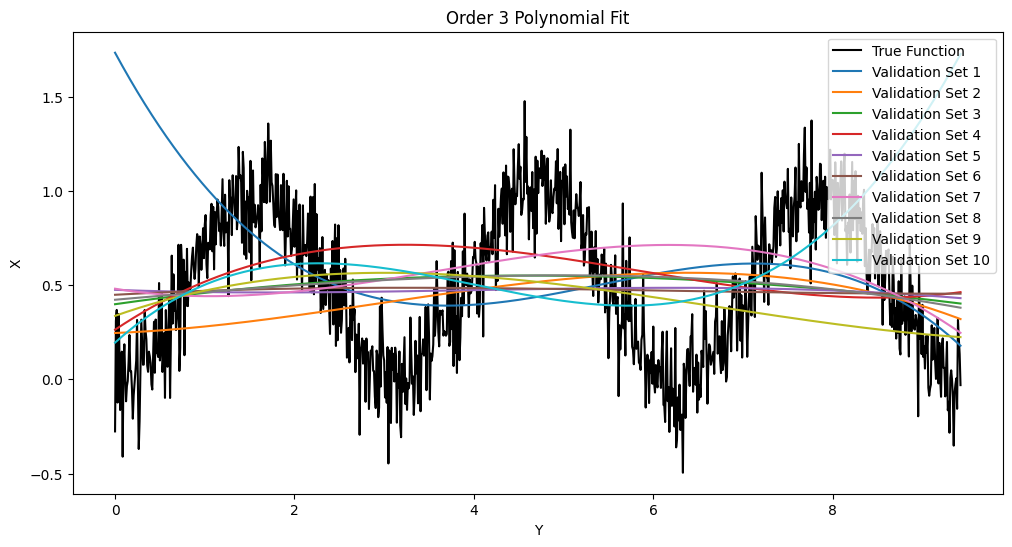

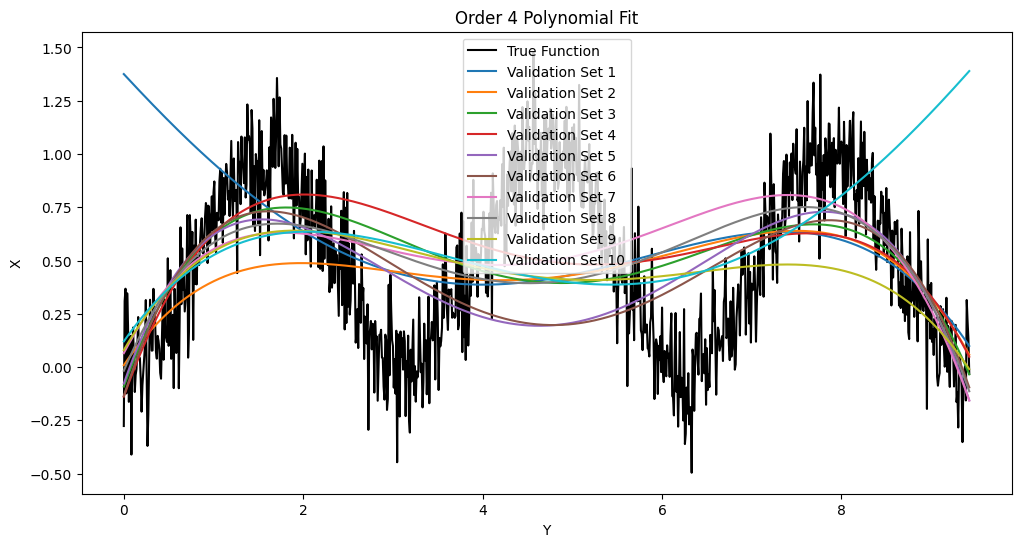

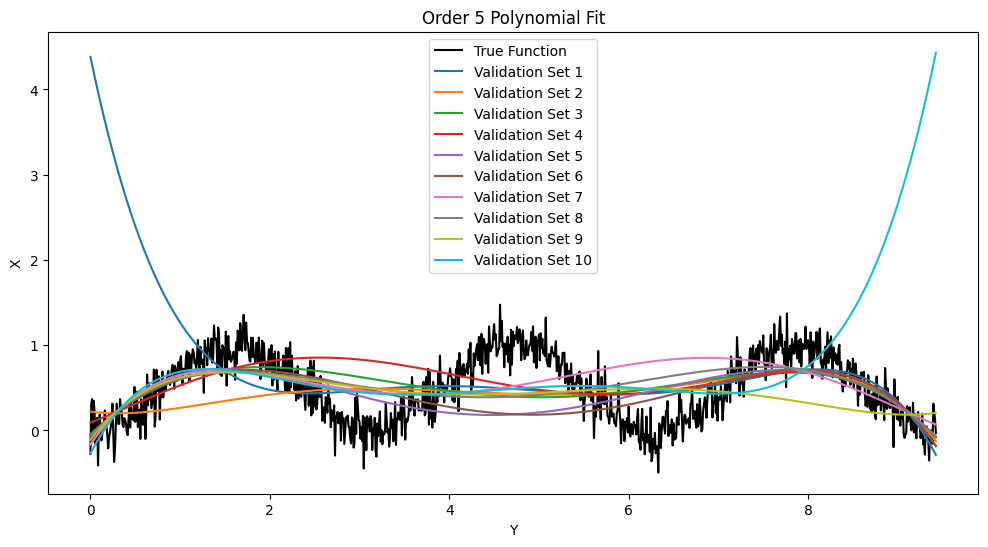

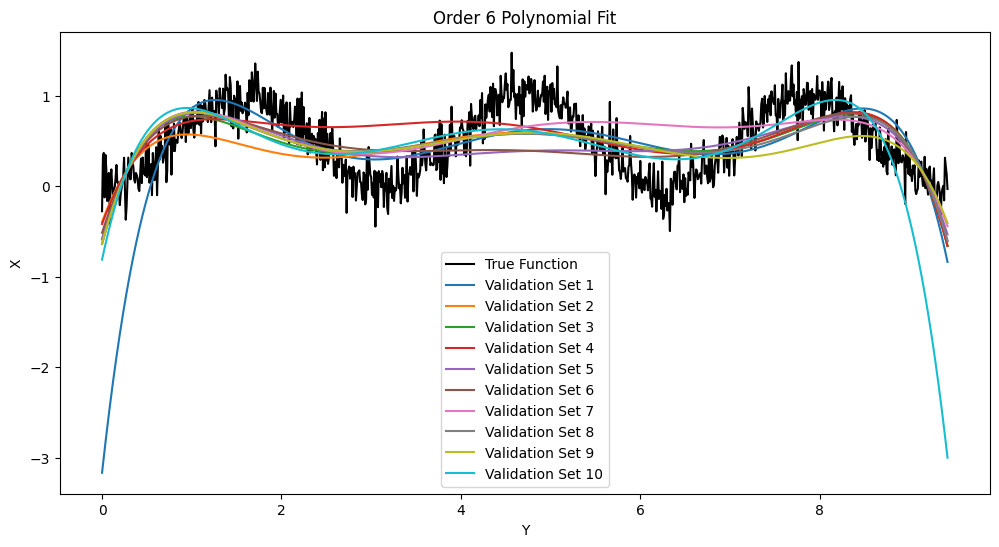

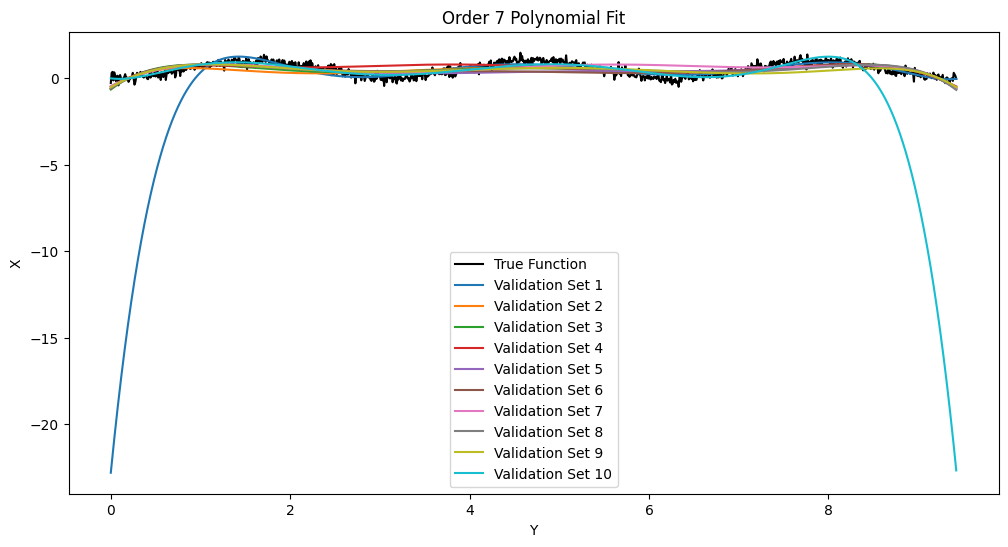

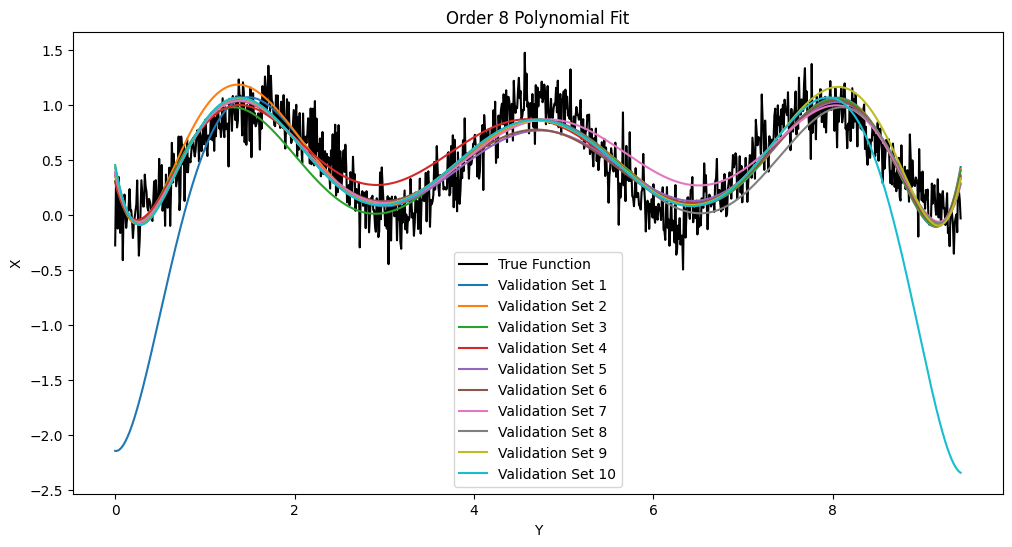

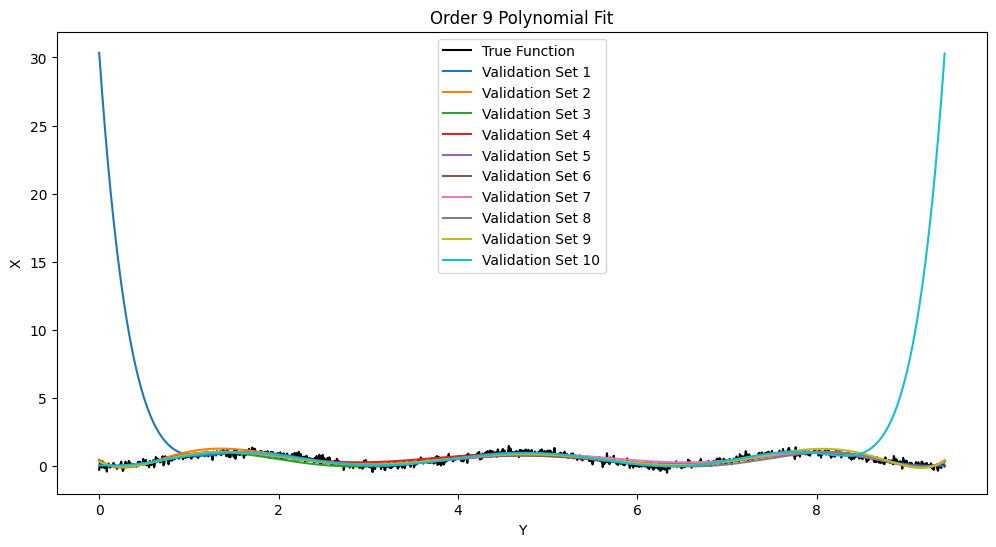

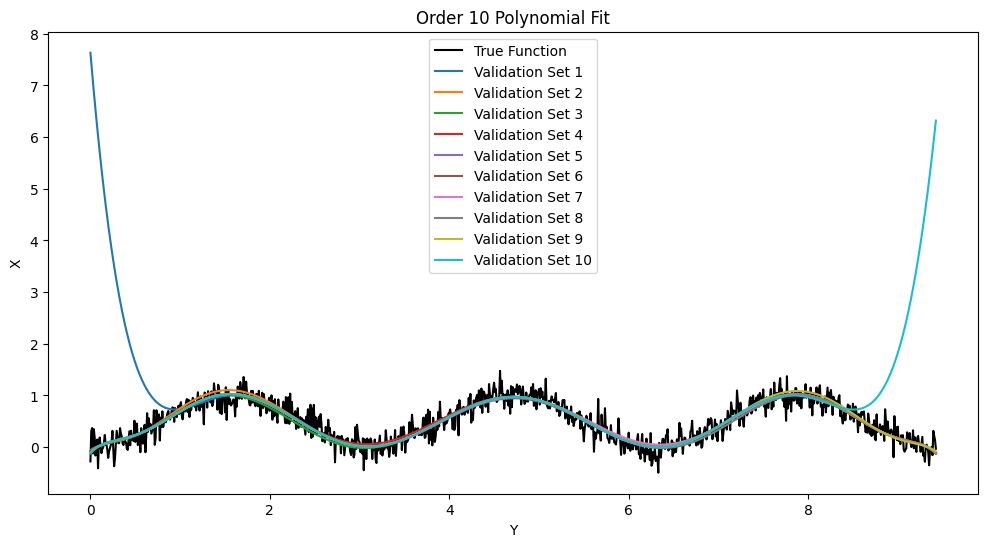

In [156]:
k = 10
fold_size = len(X) // k

for order in range(1, 11):
    fitted_polys = []
    plt.figure(figsize=(12, 6))
    plt.plot(X_plot, y_plot, color='black', label='True Function')

    for i in range(k):
        start_idx = i * fold_size
        end_idx = start_idx + fold_size
        X_train = np.concatenate((X[:start_idx], X[end_idx:]))
        y_train = np.concatenate((y_true[:start_idx], y_true[end_idx:]))
        X_val = X[start_idx:end_idx]
        y_val = y_true[start_idx:end_idx]
        poly_coeff = np.polyfit(X_train, y_train, deg=order)
        fitted_poly = np.poly1d(poly_coeff)
        fitted_polys.append(fitted_poly)
        plt.plot(X, fitted_poly(X), label=f'Validation Set {i+1}')

    plt.title(f'Order {order} Polynomial Fit')
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.legend()
    plt.show()


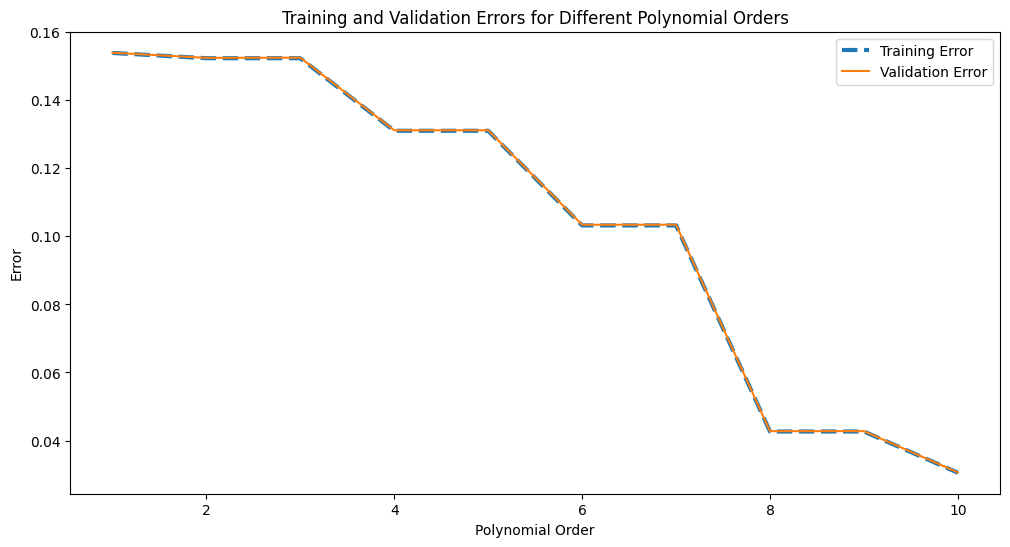

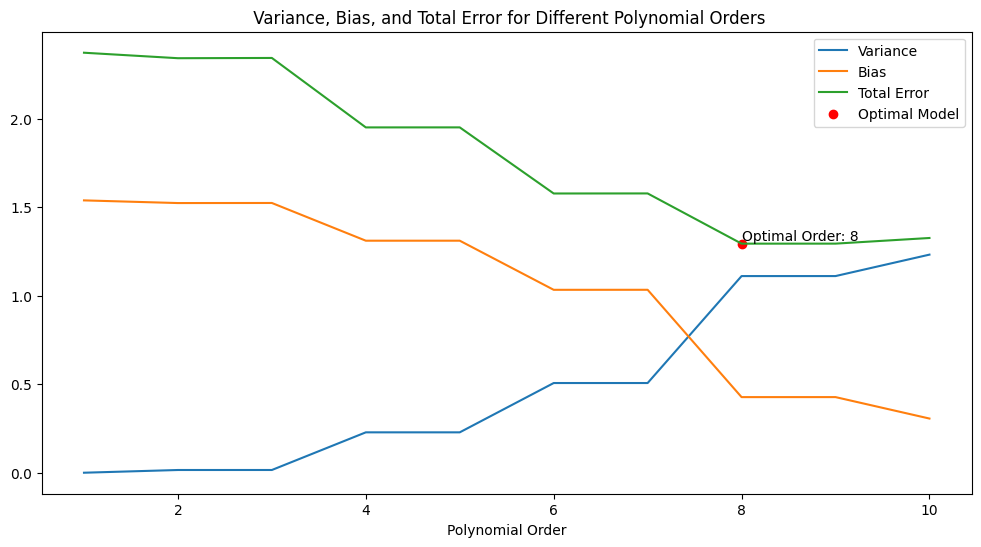

In [157]:
train_errors = []
val_errors = []
variances = []
biases = []
total_errors = []

kfold = KFold(n_splits=10, shuffle=True, random_state=9)
for train_index, test_index in kfold.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y_true[train_index], y_true[test_index]
    fold_train_errors = []
    fold_val_errors = []
    fold_variances = []
    fold_biases = []
    fold_total_errors = []
    
    for order in order_range:
        poly_coeff = np.polyfit(X_train, y_train, order)
        fitted_poly = np.poly1d(poly_coeff)
        y_train_pred = fitted_poly(X_train)
        y_val_pred = fitted_poly(X_val)

        train_error = mean_squared_error(y_train, y_train_pred)
        val_error = mean_squared_error(y_val, y_val_pred)
        

        variance = np.mean(np.var(y_val_pred, axis=0))*10
        

        bias = np.mean((y_val_pred - y_val) ** 2)*10
        

        total_error =  bias*bias + variance
        
        fold_train_errors.append(train_error)
        fold_val_errors.append(val_error)
        fold_variances.append(variance)
        fold_biases.append(bias)
        fold_total_errors.append(total_error)
    
    train_errors.append(fold_train_errors)
    val_errors.append(fold_val_errors)
    variances.append(fold_variances)
    biases.append(fold_biases)
    total_errors.append(fold_total_errors)



avg_train_errors = np.mean(train_errors, axis=0)
avg_val_errors = np.mean(val_errors, axis=0)
avg_variances = np.mean(variances, axis=0)
avg_biases = np.mean(biases, axis=0)
avg_total_errors = np.mean(total_errors, axis=0)

optimal_index = np.argmin(avg_total_errors)
optimal_order = order_range[optimal_index]
optimal_error = avg_total_errors[optimal_index]


plt.figure(figsize=(12, 6))
plt.plot(order_range, avg_train_errors, label='Training Error', linestyle='--', linewidth=3)
plt.plot(order_range, avg_val_errors, label='Validation Error')
plt.title('Training and Validation Errors for Different Polynomial Orders')
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(order_range, avg_variances, label='Variance')
plt.plot(order_range, avg_biases, label='Bias')
plt.plot(order_range, avg_total_errors, label='Total Error')
plt.scatter(optimal_order, optimal_error, color='red', label='Optimal Model')
plt.title(' Variance, Bias, and Total Error for Different Polynomial Orders')
plt.xlabel('Polynomial Order')
plt.ylabel('')
plt.legend()
plt.text(optimal_order, np.min(avg_total_errors), f'Optimal Order: {optimal_order}', 
         verticalalignment='bottom', horizontalalignment='left')
plt.show()



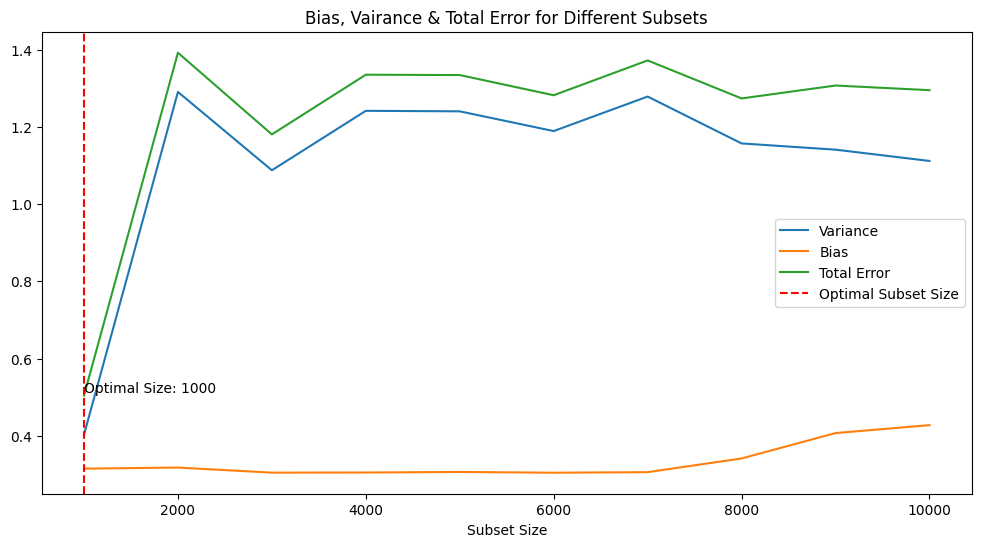

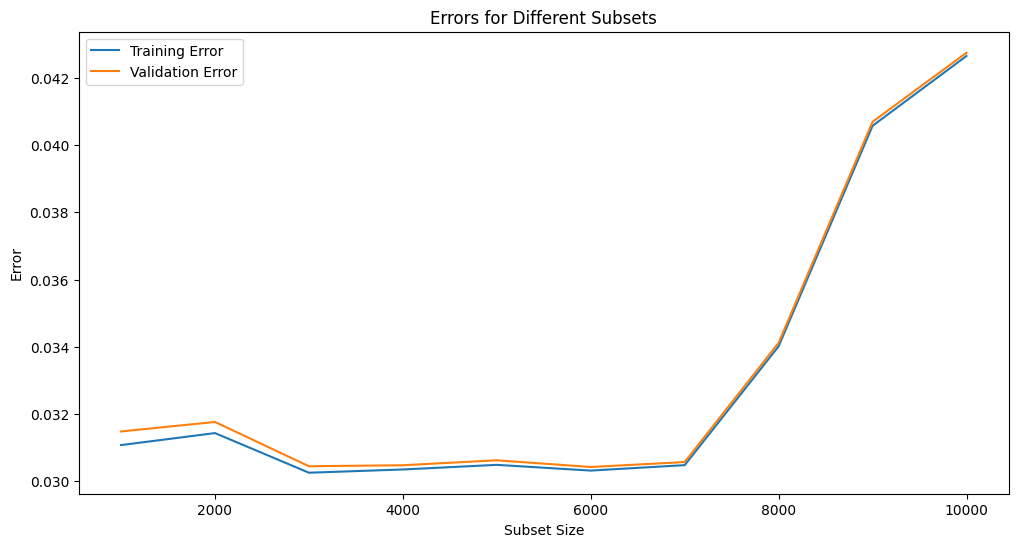

In [169]:

subset_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

subsets = []

for size in subset_sizes:
    subset_X = X[:size]
    subset_y = y_true[:size]
    subsets.append((subset_X, subset_y))

order = 8
k = 10

training_errors = []
validation_errors = []
variances = []
biases = []
total_errors = []


for subset_X, subset_y in subsets:
    
    fold_training_errors = []
    fold_validation_errors = []
    fold_variances = []
    fold_biases = []
    fold_total_errors = []

    
    kfold = KFold(n_splits=k, shuffle=True, random_state=9)
    for train_index, val_index in kfold.split(subset_X):
       
        X_train, X_val = subset_X[train_index], subset_X[val_index]
        y_train, y_val = subset_y[train_index], subset_y[val_index]

      
        poly_coeff = np.polyfit(X_train, y_train, order)
        fitted_poly = np.poly1d(poly_coeff)
        y_train_pred = fitted_poly(X_train)
        y_val_pred = fitted_poly(X_val)

        train_error = mean_squared_error(y_train, y_train_pred)
        val_error = mean_squared_error(y_val, y_val_pred)
        
        variance = np.mean(np.var(y_val_pred, axis=0)) *10

       
        bias = np.mean((y_val_pred - y_val) ** 2) *10

        
        total_error = variance + bias * bias

        fold_training_errors.append(train_error)
        fold_validation_errors.append(val_error)
        fold_variances.append(variance)
        fold_biases.append(bias)
        fold_total_errors.append(total_error)

    training_errors.append(fold_training_errors)
    validation_errors.append(fold_validation_errors)
    variances.append(fold_variances)
    biases.append(fold_biases)
    total_errors.append(fold_total_errors)


avg_training_errors = np.mean(training_errors, axis=1)
avg_validation_errors = np.mean(validation_errors, axis=1)
avg_variances = np.mean(variances, axis=1)
avg_biases = np.mean(biases, axis=1)
avg_total_errors = np.mean(total_errors, axis=1)


optimal_index = np.argmin(avg_total_errors)
optimal_subset_size = subset_sizes[optimal_index]


plt.figure(figsize=(12, 6))
plt.plot(subset_sizes, avg_variances, label='Variance')
plt.plot(subset_sizes, avg_biases, label='Bias')
plt.plot(subset_sizes, avg_total_errors, label='Total Error')
plt.axvline(x=optimal_subset_size, color='r', linestyle='--', label='Optimal Subset Size')
plt.title('Bias, Vairance & Total Error for Different Subsets')
plt.xlabel('Subset Size')
plt.ylabel('')
plt.legend()
plt.text(optimal_subset_size, np.min(avg_total_errors), f'Optimal Size: {optimal_subset_size}', 
         verticalalignment='bottom', horizontalalignment='left')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(subset_sizes, avg_training_errors, label='Training Error')
plt.plot(subset_sizes, avg_validation_errors, label='Validation Error')
plt.title('Errors for Different Subsets')
plt.xlabel('Subset Size')
plt.ylabel('Error')
plt.legend()
plt.show()

